In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

<span style="font-size: 1.5em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 데이터 살펴보기
</span>

[원본데이터 - 국가통계포털](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

In [42]:
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [43]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [44]:
df["상품군별"].value_counts()

상품군별
컴퓨터 및 주변기기      198
가전·전자·통신기기      198
소프트웨어           198
서 적             198
사무·문구           198
음반·비디오·악기       198
의류 및 패션 관련상품    198
스포츠·레저용품        198
화장품             198
아동·유아용품         198
음·식료품           198
농축수산물           198
생활용품 및 자동차용품    198
기 타             198
Name: count, dtype: int64

In [45]:
df["국가(대륙)별"].value_counts()

국가(대륙)별
미국            308
중국            308
일본            308
아세안(ASEAN)    308
유럽연합(EU)      308
중동            308
중남미           308
대양주           308
기타            308
Name: count, dtype: int64

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계 구하기
</span>


In [46]:
df['연도'] = df['시점'].map(lambda x: int(x.split('.')[0]))
df['분기'] = df['시점'].map(lambda x: int(x.split('.')[1][0]))

df.rename({'데이터':'백만'}, axis=1, inplace=True)

In [47]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [56]:
describe_df = df.describe()

describe_df.style.format("{:.2f}").set_caption("요약 통계").background_gradient(cmap='viridis', subset=pd.IndexSlice[:, '백만'])

,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석하기
</span>

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지 `pivot_table`을 통해 값을 구하고 시각화하기

In [81]:
pivot = df.pivot_table(
    index="국가(대륙)별", values="백만",
    columns="연도", aggfunc="sum")

In [84]:
pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


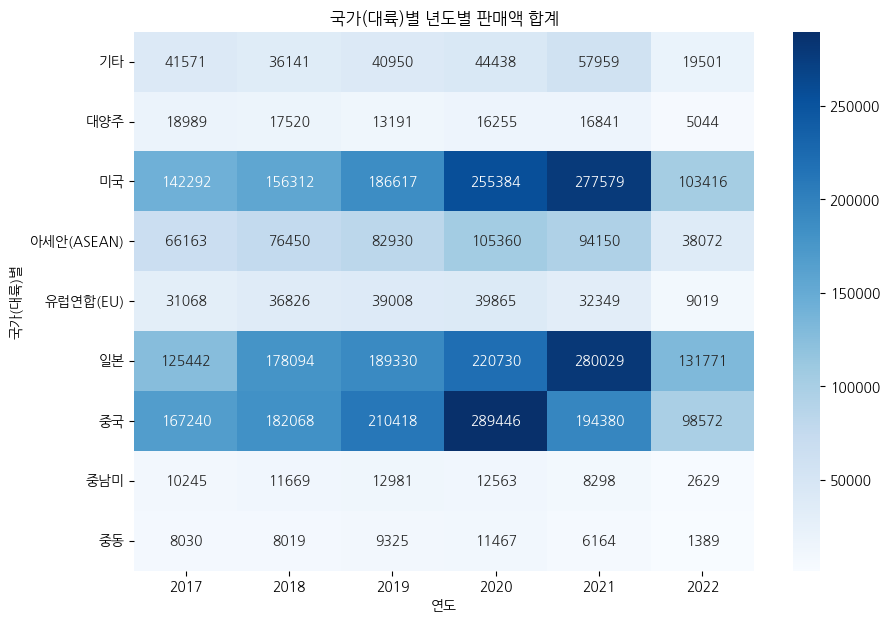

In [115]:
plt.figure(figsize=(10, 7))
plt.title("국가(대륙)별 년도별 판매액 합계")
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues');

<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Seaborn 시각화 색상 정리 (cmap)
</span>


- **`viridis`**: ![#440154](https://placehold.co/15x15/440154/440154.png) 파란색에서 ![#fde725](https://placehold.co/15x15/fde725/fde725.png) 노란색으로 변하는 색상 (디폴트 컬러맵)
- **`plasma`**: ![#0d0887](https://placehold.co/15x15/0d0887/0d0887.png) 자주색에서 ![#f0f921](https://placehold.co/15x15/f0f921/f0f921.png) 노란색으로 변하는 색상
- **`inferno`**: ![#000004](https://placehold.co/15x15/000004/000004.png) 검은색에서 ![#fcffa4](https://placehold.co/15x15/fcffa4/fcffa4.png) 노란색으로 변하는 색상
- **`magma`**: ![#000004](https://placehold.co/15x15/000004/000004.png) 검은색에서 ![#fb8660](https://placehold.co/15x15/fb8660/fb8660.png) 주황색으로 변하는 색상
- **`coolwarm`**: ![#3b4cc0](https://placehold.co/15x15/3b4cc0/3b4cc0.png) 파란색에서 ![#b40426](https://placehold.co/15x15/b40426/b40426.png) 빨간색으로 변하는 색상
- **`RdYlBu`**: ![#d73027](https://placehold.co/15x15/d73027/d73027.png) 빨간색에서 ![#ffffbf](https://placehold.co/15x15/ffffbf/ffffbf.png) 노란색, 그리고 ![#4575b4](https://placehold.co/15x15/4575b4/4575b4.png) 파란색으로 변하는 색상
- **`YlGnBu`**: ![#ffffcc](https://placehold.co/15x15/ffffcc/ffffcc.png) 노란색에서 ![#41b6c4](https://placehold.co/15x15/41b6c4/41b6c4.png) 초록색, 그리고 ![#225ea8](https://placehold.co/15x15/225ea8/225ea8.png) 파란색으로 변하는 색상
- **`Blues`**: 다양한 파란색 계열 ![#f7fbff](https://placehold.co/15x15/f7fbff/f7fbff.png) -> ![#08306b](https://placehold.co/15x15/08306b/08306b.png)

</br>

<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 결과 해석
</span>

- 일본, 중국, 미국이 온라인 구매액의 대부분 비중을 차지하고 있다. 
- 주로 2020년과 2021년에 활발히 진행되었는데, 당시에 **코로나**라는 특이한 상황에 의해 빚어진 것으로 보인다.
    - 이러한 배경으로 인해, 기존에 어느정도 거래가 있었던 **중동, 중남미**와의 거래는 줄어들었다.
- **코로나**와는 달리, 중국은 이전부터 온라인 구매와 판매가 활발히 이뤄지고 있었던 것을 알 수 있다.
- 코로나 이후, 2022년에는 모든 온라인 거래의 합계액이 많이 감소한 것을 볼 수 있다. 
    - 주요 원인으로는 **포스트 코로나**로 인해, 일상 생활이 어느정도 복구되면서 발생한 영향으로 보인다.
    - 뿐만 아니라, 2022년도에 정부에서 진행했던 코로나로 인해 침체되었던 **내수시장 부활을 위한 재난지원금**과 같은 정책들로 인한 여파로도 해석할 수 있다.

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석하기
</span>

**배경** : 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기이며 이로 인해 아마존 등의 해외 온라인 판매가 늘어난 시기
- 소비행태가 낮은 가격을 추구하는 방식으로 조금씩 변화함

In [97]:
df_2020 = df[df['연도'] == 2020]
df_2020.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1


In [106]:
group = df.groupby(by=['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
group

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,10229,19956,27,753,10477,23602,215,3433,10042,3330,27266,31925,26485,72820
대양주,19075,4785,12,196,7158,1965,136,3576,2931,741,8561,20456,2090,16158
미국,41748,150888,128,5947,52839,49703,3723,27515,23442,10896,132356,380751,29955,211709
아세안(ASEAN),51038,15445,138,13839,33714,27261,76,33371,21209,9330,66642,150556,3465,37041
유럽연합(EU),14466,18038,3,1032,12256,2717,580,5775,6665,698,44452,26368,10844,44241
일본,7899,151123,30,11899,23696,5124,61,4665,3837,29256,56056,645969,728,185053
중국,6217,52203,418,1762,59043,45442,110,12460,28813,14775,291703,408602,847,219729
중남미,4634,2964,0,233,8406,2063,101,1333,1048,783,24119,3238,1483,7980
중동,4032,2323,0,33,6234,1025,92,900,805,999,7459,6273,1760,12459


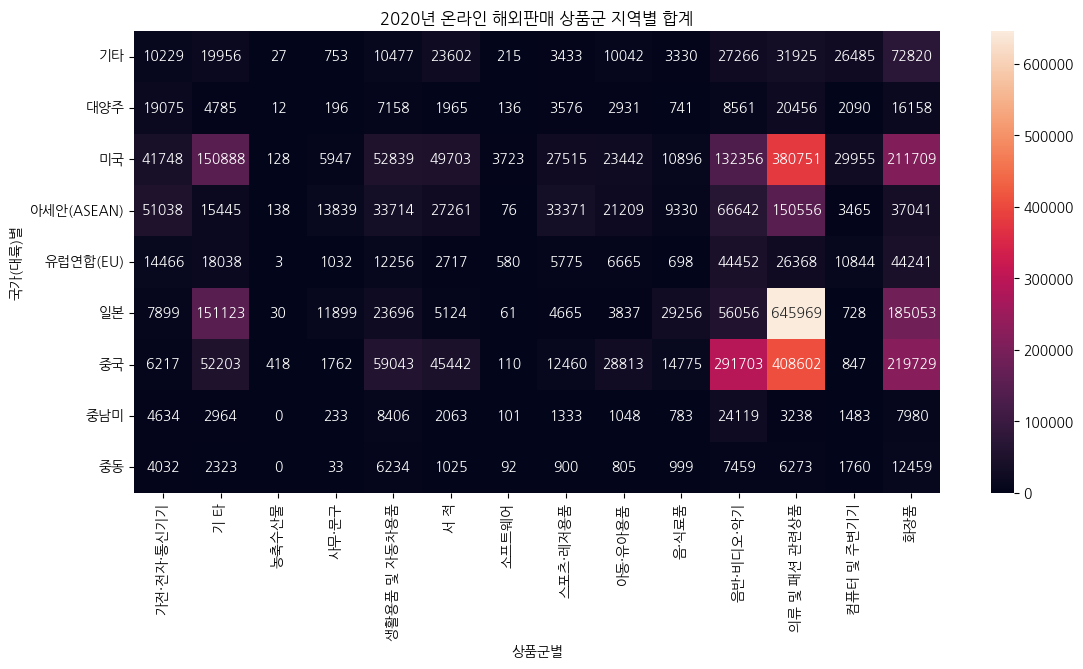

In [114]:
plt.figure(figsize=(13, 6))
plt.title("2020년 온라인 해외판매 상품군 지역별 합계")
sns.heatmap(group, annot=True, fmt='.0f');

<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 결과 해석
</span>

- 앞선 결과에서 중국, 일본, 미국이 온라인 판매액의 합계가 높은 것을 볼 수 있었다.
- 2020년에는 주로 **음반, 비디오, 악기** 판매액이 높았던 것을 볼 수 있다. (기타 판매액도 높은 것을 알 수 있다.)
- 주로 소프트웨어와 농축수산물의 거래는 거의 없는 수준이었다.
    - 아무래도 코로나로 인한 영향이 농축수산물에는 큰 영향을 주지 않은 것으로 보인다.
- 외부로 나갈 일이 많이 줄어들었음에도 화장품의 판매가 꾸준히 높은 것을 볼 수 있다.
    - 기초 화장품을 포함한다고 하더라고 조금 확인할 가치가 있는 수치로 판단, 이를 **추가 시각화**한다.
</br></br>
- **미국**은 여러 상품군에서 높은 판매량을 기록하며, 특히 **의류 및 패션 관련상품**과 **가전·전자·통신기기**에서 두드러진 성과를 보인다.
- **중국**은 **의류 및 패션 관련상품**과 **음반·비디오·악기**에서 큰 판매량을 기록, **화장품**에서도 강세를 보인다.
- **일본**은 **의류 및 패션 관련상품**과 **기타** 상품군에서 주목할 만한 판매량을 기록했다.
- 아세안(ASEAN)은 **가전·전자·통신기기**와 **스포츠·레저용품**에서 강한 성과를 나타냈다.
- 유럽연합(EU)은 **음반·비디오·악기**와 **의류 및 패션 관련상품**에서 두각을 나타냈다.
</br></br>
- 주로 의류 및 패션 관련상품의 판매량이 높은 경향이 있는데, 이는 아무래도 오프라인 시장이 코로나로 인해 마비됨에 따라, 온라인 시장이 의류 분야에서 주도권을 잡은 것으로 보인다.
    - 특히 **일본**의 판매량이 많이 높은데, 이는 J-POP의 흥행으로 비롯된 J-Fashion의 유행의 영향으로 해석할 수 있다.
    - 중국과 미국의 경우, **알리 익스프레스**나 여타 플랫폼에서의 구매, 뿐만 아니라 미국의 **시티보이**와 같은 패션이 국내로 들어왔기 떄문이라고 볼 수도 있다.
    - 코로나를 전후로 국내 패션의 유행흐름이 바뀌었는데, 기존 한국 패션에서 Y2K, 시티보이 등, 넓은 스펙트럼의 패션 유행이 시작되면서 구매가 늘어난 것으로 해석된다.(대중의 패션에 대한 관심도가 증가)


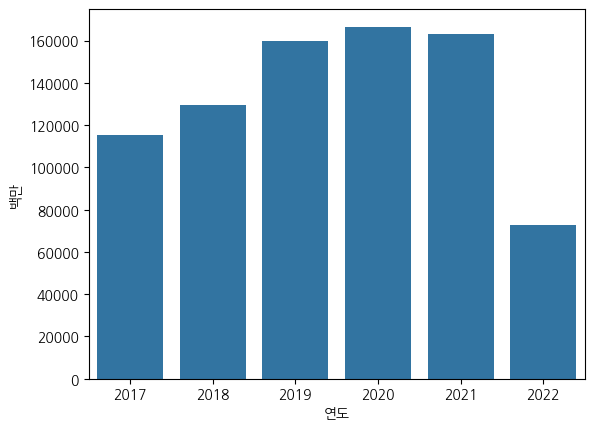

In [124]:
beauty = df[df['상품군별'] == '화장품'].groupby(by='연도')['백만'].sum()
sns.barplot(beauty);

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화하기
</span>

In [198]:
cond_1 = df['국가(대륙)별'].isin(['미국','중국','일본'])
cond_2 = df['상품군별'].isin(['의류 및 패션 관련상품', '화장품', '음반·비디오·악기'])
cond_3 = df['연도'] < 2022
main_products = df[cond_1 & cond_2 & cond_3]

In [203]:
main_products.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1


In [204]:
main_products_group = main_products.groupby(by=['국가(대륙)별', '연도', '상품군별'])['백만'].sum()
main_products_group.unstack()

상품군별          음반·비디오·악기  의류 및 패션 관련상품    화장품
국가(대륙)별 연도                                  
미국      2017       8628         49891  31237
        2018      13858         47353  38537
        2019      19596         55125  41786
        2020      32919         82154  49446
        2021      41841        100662  38665
일본      2017       2824         89085   6333
        2018       7018        134742   5276
        2019       8712        131538  10906
        2020      14738        119452  42215
        2021      15940        118959  77124
중국      2017       8437         84248  34608
        2018      15046         87611  43873
        2019      36193         77844  59445
        2020     125078         73068  38855
        2021      62874         64078  30472

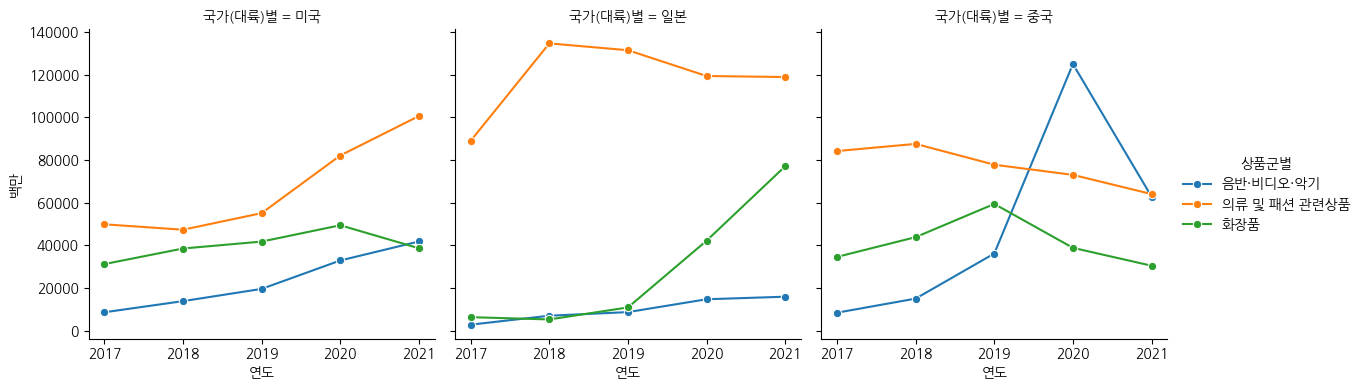

In [215]:
main_products_group_reset = main_products_group.reset_index()
g = sns.FacetGrid(main_products_group_reset, col="국가(대륙)별", hue="상품군별", height=4, aspect=1)

g.map(sns.lineplot, "연도", "백만", marker="o")
g.add_legend(title="상품군별")
g.set_axis_labels("연도", "백만")
g.set_titles("국가(대륙)별 = {col_name}")
for ax in g.axes.flat:
    ax.set_xticks(main_products_group_reset['연도'].unique().astype(int))
    ax.set_xticklabels(main_products_group_reset['연도'].unique().astype(int))
plt.show()
